### Ames Housing Dataset - ML Project - Martin Kihn / NYCDSA - January 2021
### Ames ML Project Data Prep

In [80]:
#Load the data for the project
import numpy as np
import pandas as pd

path_to_train = '~/Desktop/Ames_ML_Project/train.csv'
path_to_test = '~/Desktop/Ames_ML_Project/test.csv'

df_train = pd.read_csv(path_to_train)
df_test = pd.read_csv(path_to_test)

In [81]:
#combine train and test into master df
#used for formatting/feature selection only (test has no target)

df = pd.concat(objs=[df_train, df_test], axis=0)

In [82]:
df.shape

(2919, 81)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [84]:
#drop features with few values - Pool Y/N is captured elsewhere
df.drop(['Alley', 'PoolQC', 'MiscFeature', 'MiscVal'], axis=1, inplace=True)

In [85]:
#use numpy NaNs for missing vals
df.replace(['NA', ''], np.NaN)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,NaN,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NaN,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,NaN,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,NaN,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,MnPrv,7,2006,WD,Normal,NaN


In [86]:
#convert all numeric vars to float - just for consistency
numeric_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']
df[numeric_cols] = df[numeric_cols].astype('float')

In [87]:
#delete non-residential transactions (e.g., commercial, agricultural)
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [88]:
df = df.drop(df[(df['MSZoning'] == 'C (all)') | (df['MSZoning'] == 'I (all)') |\
                 (df['MSZoning'] == 'A (agr)')].index)

In [89]:
df.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [90]:
#also remove transactions where SaleCondition wasn't 'normal'
df = df.drop(df[(df['SaleCondition'] == 'Family') | \
               (df['SaleCondition'] == 'Abnormal')].index)

In [91]:
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import seaborn as sns

In [92]:
#take a look at missing values
miss = (df.isnull().sum() / len(df)) * 100
miss = miss.drop(miss[miss == 0].index).sort_values(ascending=False)
miss[0:,]

Fence           80.662586
SalePrice       49.981995
FireplaceQu     48.145481
LotFrontage     16.924739
GarageCond       5.257472
GarageQual       5.257472
GarageFinish     5.257472
GarageYrBlt      5.257472
GarageType       5.185452
BsmtCond         2.844797
BsmtExposure     2.844797
BsmtFinType2     2.772776
BsmtQual         2.736766
BsmtFinType1     2.736766
MasVnrType       0.828232
MasVnrArea       0.792222
MSZoning         0.144040
BsmtFullBath     0.072020
BsmtHalfBath     0.072020
Functional       0.072020
Utilities        0.072020
BsmtUnfSF        0.036010
BsmtFinSF2       0.036010
SaleType         0.036010
BsmtFinSF1       0.036010
Electrical       0.036010
KitchenQual      0.036010
GarageCars       0.036010
Exterior2nd      0.036010
Exterior1st      0.036010
GarageArea       0.036010
TotalBsmtSF      0.036010
dtype: float64

In [93]:
#the following missing values appear to indicate "none"
impute_none_cols = ['Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', \
                   'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', \
                   'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', \
                   'TotalBsmtSF', 'GarageCars', 'GarageArea', 'Exterior1st', 'Exterior2nd']

In [94]:
for col in impute_none_cols:
    df[col] = df[col].fillna(0)

In [95]:
miss = df.isnull().sum()
miss = miss.drop(miss[miss == 0].index).sort_values(ascending=False)
miss[1:,]

LotFrontage    470
MSZoning         4
Functional       2
Utilities        2
SaleType         1
KitchenQual      1
Electrical       1
dtype: int64

In [96]:
#the following can be replaced with the most common value (mode):
impute_mode_cols = ['MSZoning', 'Functional', 'Utilities', 'Electrical', 'SaleType', 'KitchenQual']

In [97]:
for col in impute_mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [101]:
miss = df.isnull().sum()
miss = miss.drop(miss[miss == 0].index).sort_values(ascending=False)
miss[1:,]

LotFrontage    470
dtype: int64

In [74]:
#LotFrontage is defined as "linear feet of street connect to property"
#not obvious how to fill missing values here or if it's important
df_lot_data = df[['LotFrontage', 'LotArea', 'LotConfig', 'LotShape']]
df_lot_data.groupby(['LotShape']).mean()

,LotFrontage,LotArea
LotShape,,
IR1,74.847756,11547.719957
IR2,67.022222,19276.136986
IR3,117.000000,33939.428571
Reg,66.863106,8870.410125


In [75]:
df_lot_data.groupby(['LotConfig']).mean()

,LotFrontage,LotArea
LotConfig,,
Corner,82.929134,10952.226611
CulDSac,56.697674,15644.776471
FR2,58.083333,9989.212500
FR3,79.300000,10498.857143
Inside,67.200000,9530.124016


In [76]:
df_lot_data.groupby(['LotShape']).count()

,LotFrontage,LotArea,LotConfig
LotShape,,,
IR1,624,932,932
IR2,45,73,73
IR3,9,14,14
Reg,1629,1758,1758


In [125]:
#seems like LotShape has the most impact but IR3 is very uncommon
df[(df['LotShape'] == 'IR3') & (df['LotFrontage'].isna())].count()[1]

5

In [127]:
#for sake of expediency I'm going to fill with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

Text(0.5, 0, 'Counts')

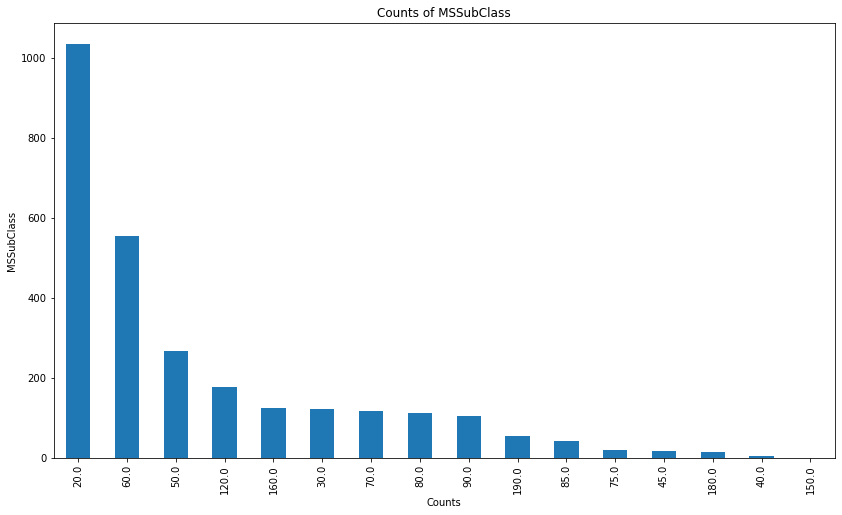

In [136]:
#MSSubClass seems complicated - want to explore that value
df['MSSubClass'].astype(str)
ax = df['MSSubClass'].value_counts().plot(kind = 'bar',
                                         figsize=(14,8),
                                         title="Counts of MSSubClass")
ax.set_ylabel("MSSubClass")
ax.set_xlabel("Counts")

In [137]:
#vast majority of houses are 1 or 2 story (or 1.5) 1946 or newer - this variable
#is about age and number of floors which are captured elsewhere - remove
df.drop(['MSSubClass'], axis=1, inplace=True)

In [139]:
#now I need to start exploring correlations and skewness etc.
#I've been using the entire data set (test/train) to keep the format
#consistent - since test_ lacks SalePrice, I will create & save two new files:
#test_process_1 (test data up to now)
#train_process_1 (train data up to now)
train_checkpoint_df = df[df['SalePrice'] > 0]

In [155]:
test_checkpoint_df = df[df['SalePrice'].isnull()]

In [157]:
test_checkpoint_df.shape, train_checkpoint_df.shape

((1388, 76), (1389, 76))

In [160]:
test_checkpoint_df.to_csv('~/Desktop/Ames_ML_Project/test_checkpoint_df')

In [161]:
train_checkpoint_df.to_csv('~/Desktop/Ames_ML_Project/train_checkpoing_df')